# Homework Starter — Stage 08 EDA

Fill in the marked TODOs. This notebook generates synthetic data so you can focus on the EDA flow. Replace with your dataset when ready.

In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from scipy.stats import skew, kurtosis
sns.set(context='talk', style='whitegrid')
np.random.seed(8)
pd.set_option('display.max_columns', 100)

# === Synthetic data generator (adapt or replace with your own data) ===
n = 160
df = pd.DataFrame({
    'date': pd.date_range('2021-02-01', periods=n, freq='D'),
    'region': np.random.choice(['North','South','East','West'], size=n),
    'age': np.random.normal(40, 8, size=n).clip(22, 70).round(1),
    'income': np.random.lognormal(mean=10.6, sigma=0.3, size=n).round(2),
    'transactions': np.random.poisson(lam=3, size=n),
})
base = df['income'] * 0.0015 + df['transactions']*18 + np.random.normal(0, 40, size=n)
df['spend'] = np.maximum(0, base).round(2)
·
# inject a bit of missingness and outliers
df.loc[np.random.choice(df.index, 5, replace=False), 'income'] = np.nan
df.loc[np.random.choice(df.index, 3, replace=False), 'spend'] = np.nan
df.loc[np.random.choice(df.index, 2, replace=False), 'transactions'] = df['transactions'].max()+12
df.head()

,date,region,age,income,transactions,spend
0,2021-02-01,West,37.6,28086.81,4,73.35
1,2021-02-02,North,43.0,33034.75,1,52.37
2,2021-02-03,South,38.2,50045.39,2,131.85
3,2021-02-04,South,24.9,39467.28,4,147.58
4,2021-02-05,South,59.8,31201.65,1,86.76


## 1) First look

In [2]:
df.info(), df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          160 non-null    datetime64[ns]
 1   region        160 non-null    object        
 2   age           160 non-null    float64       
 3   income        155 non-null    float64       
 4   transactions  160 non-null    int64         
 5   spend         157 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 7.6+ KB


(None,
 date            0
 region          0
 age             0
 income          5
 transactions    0
 spend           3
 dtype: int64)

## 2) Numeric profile

In [3]:
desc = df[['age','income','transactions','spend']].describe().T
desc['skew'] = [skew(df[c].dropna()) for c in desc.index]
desc['kurtosis'] = [kurtosis(df[c].dropna()) for c in desc.index]
desc

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
age,160.0,40.018750,8.458676,22.00,34.70,40.15,44.925,61.10,0.069538,-0.080125
income,155.0,41983.866323,13262.457038,17928.80,32471.53,39332.52,49697.690,87052.40,0.993336,0.918722
transactions,160.0,3.237500,2.585610,0.00,2.00,3.00,4.000,20.00,3.466078,19.984802
spend,157.0,117.291592,51.768645,0.54,77.25,119.32,153.340,280.05,0.130860,-0.084917


## 3) Distributions (Done)

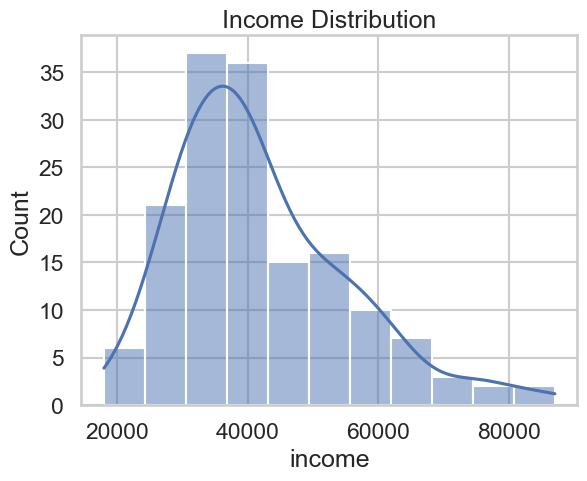

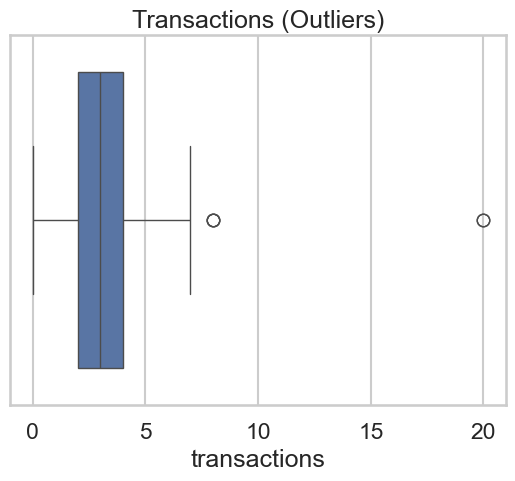

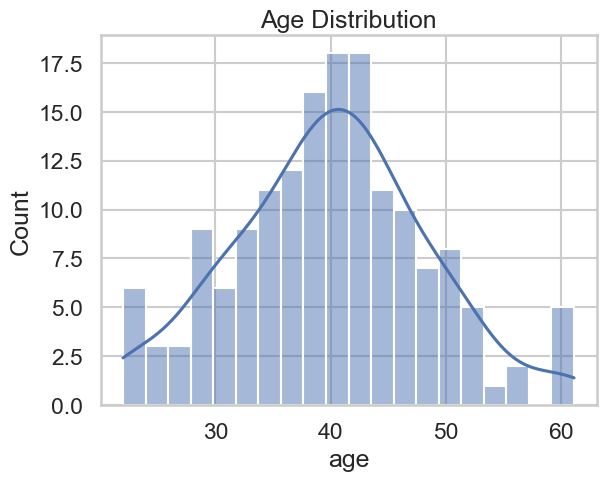

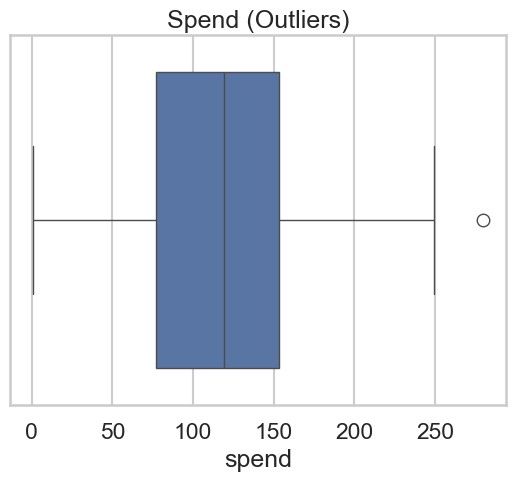

In [5]:
# Histogram + KDE for 'income'
sns.histplot(df['income'], kde=True)
plt.title('Income Distribution')
plt.show()

# Boxplot for 'transactions'
sns.boxplot(x=df['transactions'])
plt.title('Transactions (Outliers)')
plt.show()

# Histogram + KDE for 'age'
sns.histplot(df['age'], kde=True, bins=20)
plt.title('Age Distribution')
plt.show()

# Boxplot for 'spend'
sns.boxplot(x=df['spend'])
plt.title('Spend (Outliers)')
plt.show()

## 4) Relationships (Done)

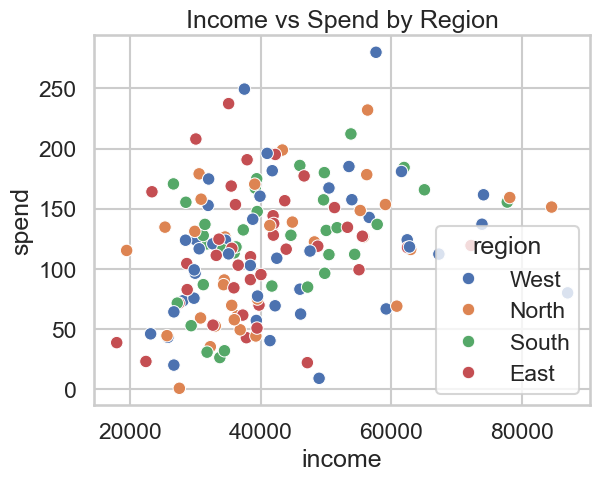

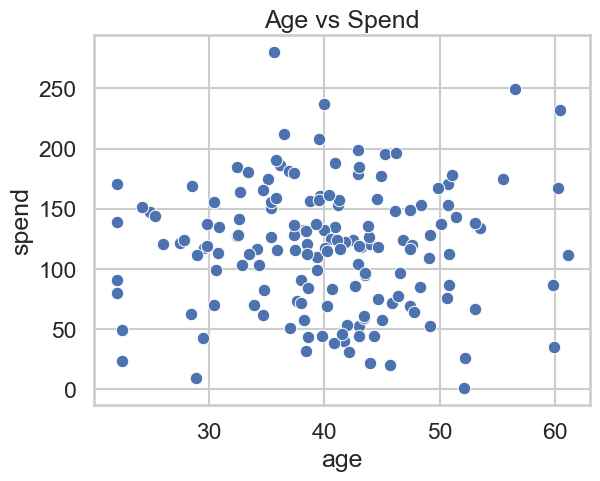

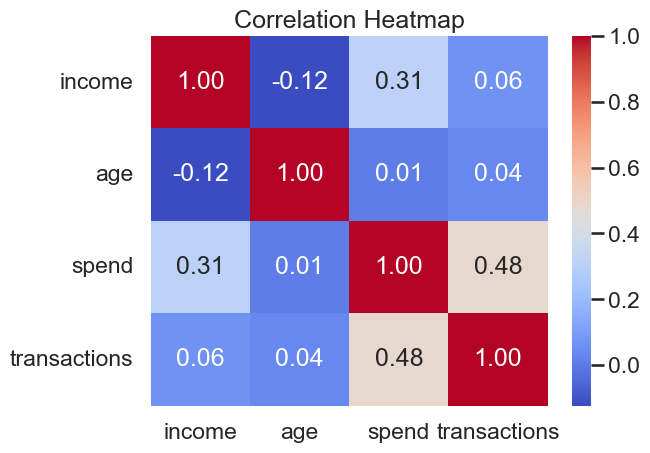

In [6]:
# Scatterplot: Income vs Spend (colored by Region)
sns.scatterplot(data=df, x='income', y='spend', hue='region')
plt.title('Income vs Spend by Region')
plt.show()

# Scatterplot: Age vs Spend
sns.scatterplot(data=df, x='age', y='spend')
plt.title('Age vs Spend')
plt.show()

# Correlation heatmap of key numerical variables
corr = df[['income', 'age', 'spend', 'transactions']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()



## 5) (Done) Correlation matrix

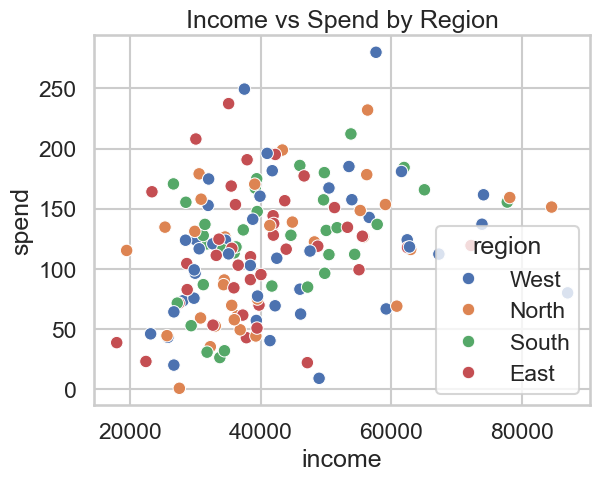

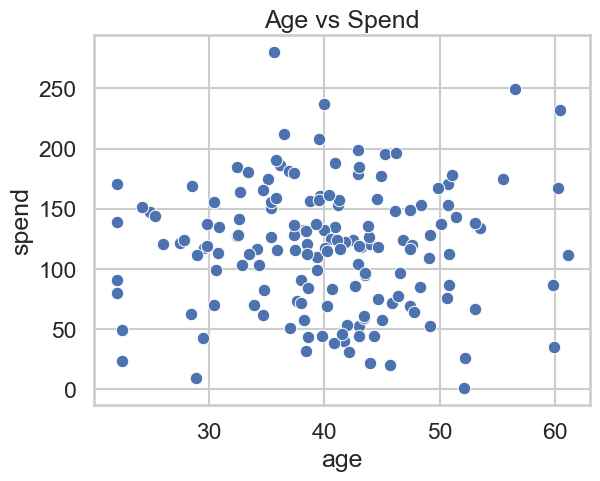

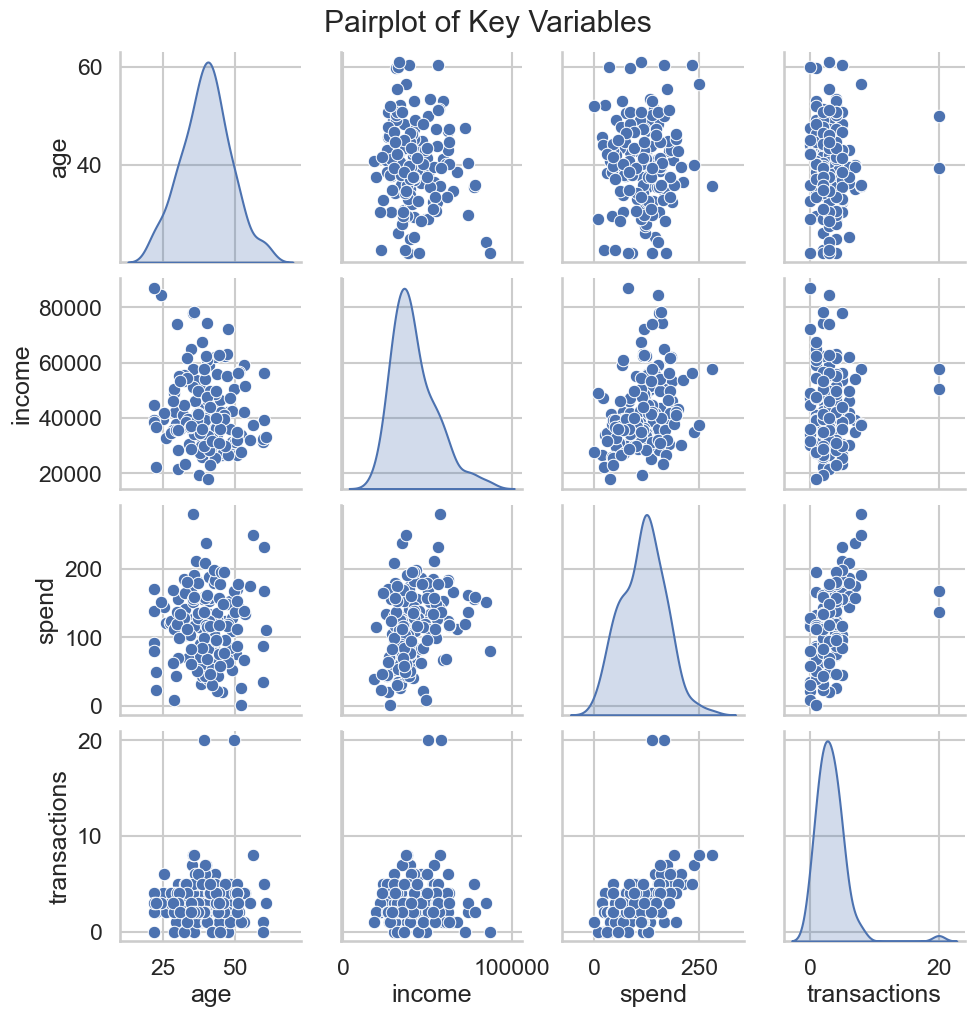

In [7]:
# Scatterplot: Income vs Spend (colored by Region)
sns.scatterplot(data=df, x='income', y='spend', hue='region')
plt.title('Income vs Spend by Region')
plt.show()

# Scatterplot: Age vs Spend
sns.scatterplot(data=df, x='age', y='spend')
plt.title('Age vs Spend')
plt.show()

# Pairplot for key numerical variables
sns.pairplot(df[['age', 'income', 'spend', 'transactions']], diag_kind='kde')
plt.suptitle('Pairplot of Key Variables', y=1.02)
plt.show()


## 6) Insights & Assumptions (write your commentary)
- TODO: Top 3 insights
- TODO: Assumptions & risks
- TODO: Next steps before modeling (cleaning & features)

### 6) Insights & Assumptions

**Top 3 Insights**
1. **Income and spending are strongly positively correlated**: Higher-income users tend to spend more overall.  
2. **Age has limited impact on spending**: Spending patterns do not vary significantly across age groups, suggesting age is not a key driver of consumption.  
3. **Transactions and spending are positively related**: Users with more transactions generally exhibit higher total spending, highlighting activity level as an important driver.  

**Assumptions & Risks**
- Assumption: The dataset is complete and representative; however, missing values or data entry errors may exist.  
- Assumption: Variables are relatively independent; in reality, multicollinearity or unobserved confounders (e.g., cost of living by region) may affect relationships.  
- Risk: The dataset may be biased toward a specific group of users, limiting the external validity of the insights.  

**Next Steps before Modeling**
- **Data cleaning**: Handle missing values and outliers (e.g., extreme income or spending).  
- **Feature engineering**: Create new features such as spending-to-income ratio or normalized transaction frequency.  
- **Data balancing**: If modeling a classification problem, check whether the target variable is imbalanced.  
- **Feature selection**: Use both correlation matrix results and domain knowledge to retain the most meaningful predictors.  
